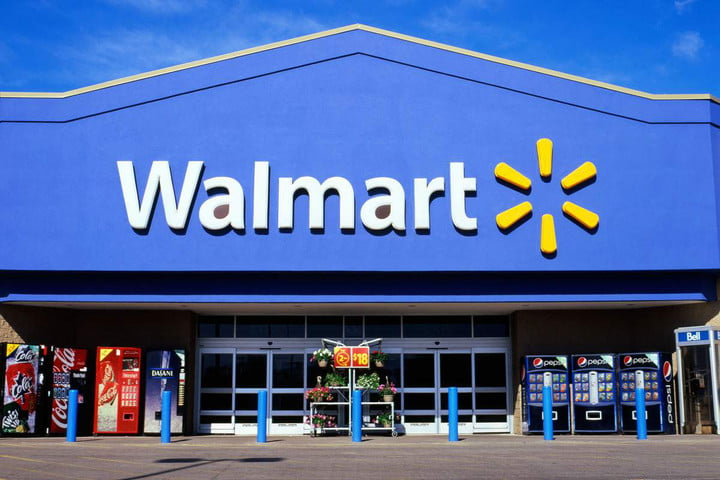

In [5]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:00<00:00, 60.4MB/s]


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1) Defining Problem Statement and Analyzing basic metrics:

**PROBLEM STATEMENT:**

Walmart, a global retail giant with over 100 million customers, is tackling a crucial business problem. The management team is keen on analyzing customer purchase behavior, specifically comparing spending patterns between genders. With a customer base of around 50 million males and 50 million females, the focus is on understanding if there are discernible distinctions in spending habits, particularly during events like Black Friday. This exploration aims to provide valuable insights for Walmart to tailor marketing strategies, optimize product offerings, and make informed operational decisions, ensuring the company remains responsive to the diverse needs and preferences of its extensive customer demographic


**User_ID:**	User ID

**Product_ID:**	Product ID

**Gender:**	Sex of User

**Age:**	Age in bins

**Occupation:**	Occupation(Masked)

**City_Category:**	Category of the City (A,B,C)

**StayInCurrentCityYears:**	Number of years stay in current city

**Marital_Status:**	Marital Status

**ProductCategory:**	Product Category (Masked)

**Purchase:**	Purchase Amount

In [6]:
df = pd.read_csv("walmart_data.csv?1641285094")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
#shape of the data

df.shape

(550068, 10)

In [8]:
#size of the data

df.size

5500680

In [9]:
#info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [10]:
#statistical summary

df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [11]:
#data types:

df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [12]:
#Coverting into categorical data:

categories = ['Gender','City_Category']
df_categories = df[categories].astype('category')
df_categories.dtypes


Gender           category
City_Category    category
dtype: object

In [13]:
#Non-Graphical Analysis: Value counts and unique attributes

df.groupby('User_ID')['Product_ID'].value_counts()

User_ID  Product_ID
1000001  P00000142     1
         P00004842     1
         P00025442     1
         P00051442     1
         P00051842     1
                      ..
1006040  P00331042     1
         P00331942     1
         P00343042     1
         P00346242     1
         P00349442     1
Name: Product_ID, Length: 550068, dtype: int64

In [14]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [15]:
df.groupby('Gender')['Age'].value_counts()

Gender  Age  
F       26-35     50752
        36-45     27170
        18-25     24628
        46-50     13199
        51-55      9894
        0-17       5083
        55+        5083
M       26-35    168835
        36-45     82843
        18-25     75032
        46-50     32502
        51-55     28607
        55+       16421
        0-17      10019
Name: Age, dtype: int64

In [ ]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
df.groupby('Gender')['Marital_Status'].value_counts()

Gender  Marital_Status
F       0                  78821
        1                  56988
M       0                 245910
        1                 168349
Name: Marital_Status, dtype: int64

In [ ]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


[]

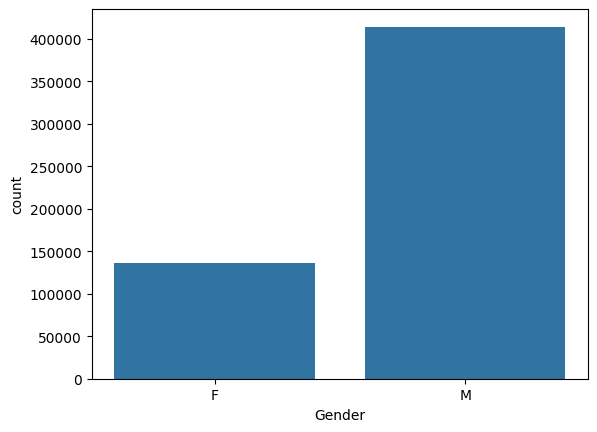

In [16]:
#Countplot for Gender:

sns.countplot(data = df, x = 'Gender')
plt.plot()

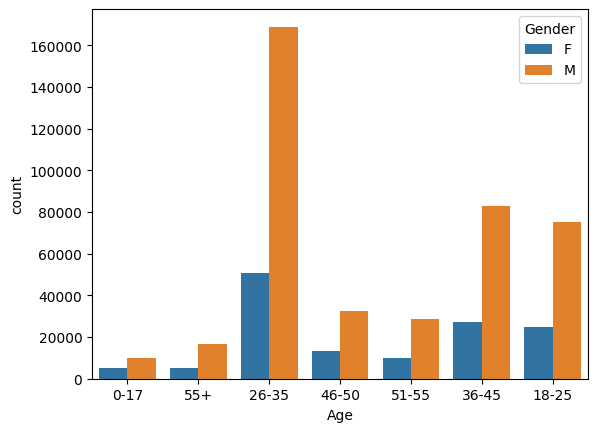

In [11]:
#Countplot for Age and Gender:

sns.countplot(data = df, x = 'Age',hue = 'Gender')
plt.show()

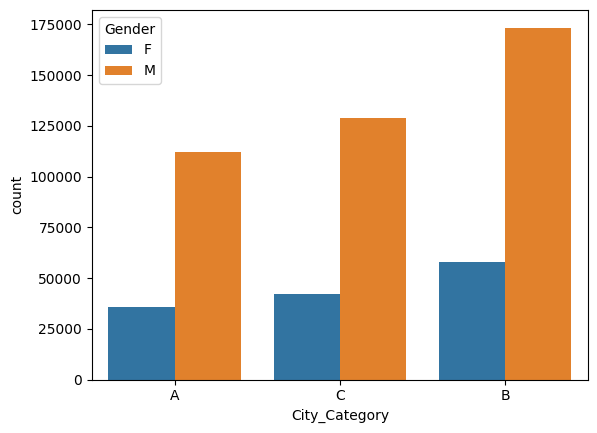

In [17]:
#Countplot for City_Category and Gender:

sns.countplot(data = df, x = 'City_Category',hue ='Gender')
plt.show()

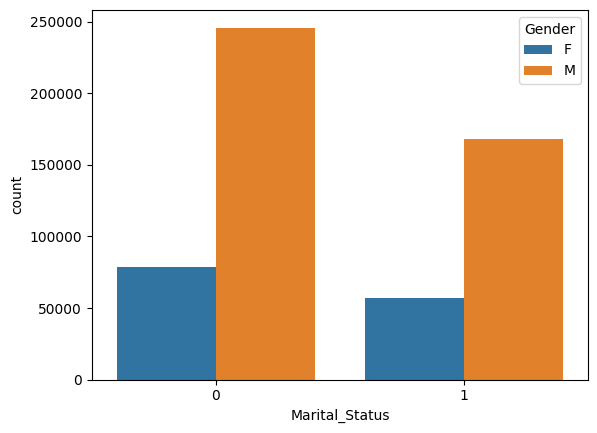

In [18]:
#Countplot for Marital_Status and Gender:

sns.countplot(data = df, x = 'Marital_Status',hue ='Gender')
plt.show()

<ipython-input-19-8163d4011864>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Purchase'], color ='g')


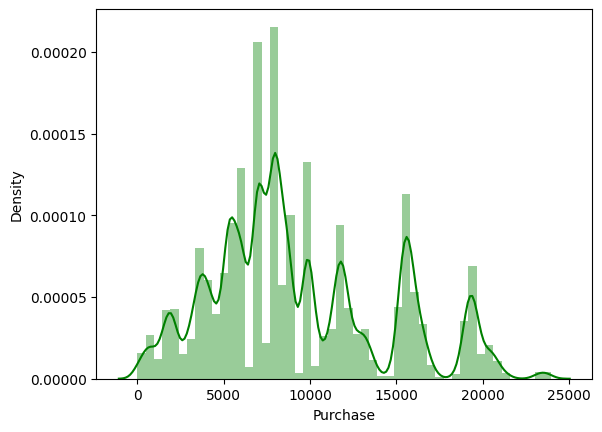

In [19]:
#Distplot for Purchase:

sns.distplot(df['Purchase'], color ='g')
plt.show()

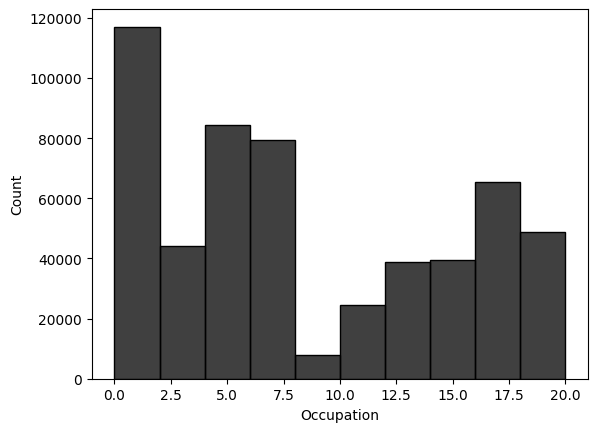

In [20]:
#Histplot for Occupation:

sns.histplot(data = df, x= 'Occupation',bins = 10,color = 'black')
plt.show()

In [37]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


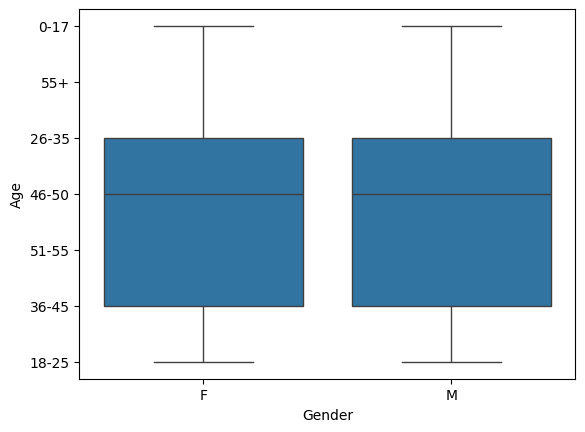

In [21]:
#Boxplot for Age and Gender:

sns.boxplot(data = df, x= 'Gender', y='Age' )
plt.show()

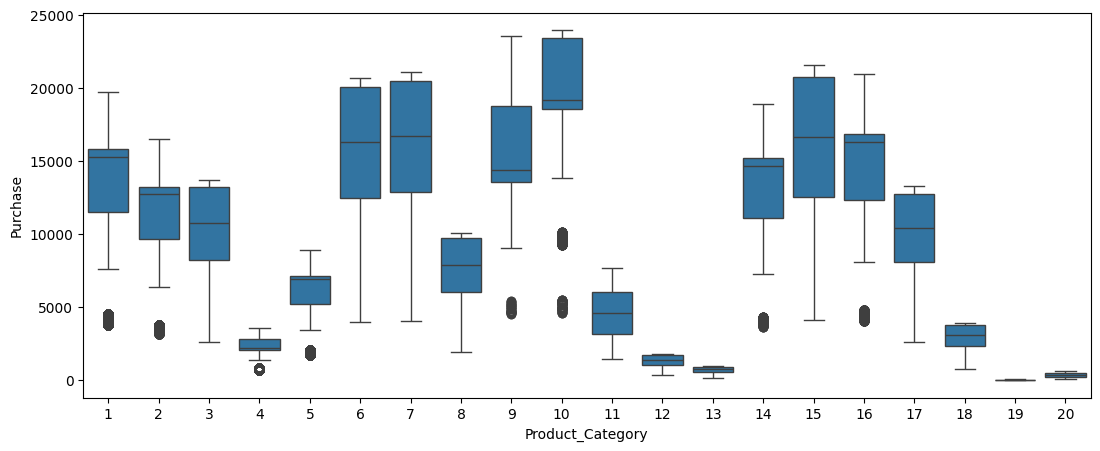

In [46]:
#Boxplot for Product_Category and Purchase:

plt.figure(figsize = (13,5))
sns.boxplot(data = df, x= 'Product_Category', y='Purchase')
plt.show()

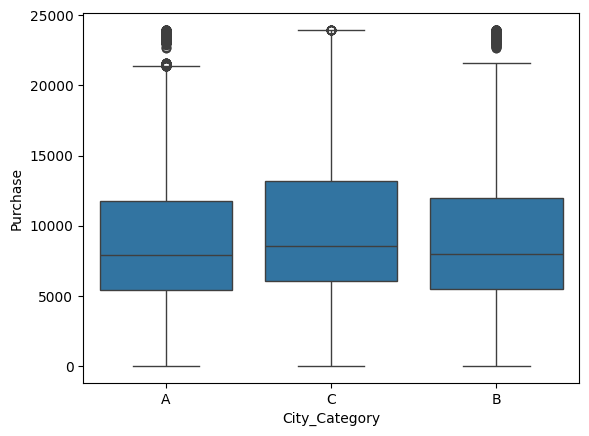

In [47]:
#Boxplot for City_Category and Purchase:

sns.boxplot(data = df, x= 'City_Category', y='Purchase' )
plt.show()

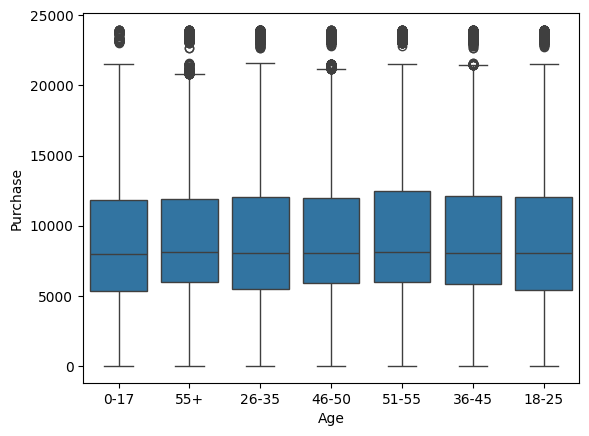

In [48]:
#Boxplot for Age and Purchase:

sns.boxplot(data = df, x= 'Age', y='Purchase' )
plt.show()

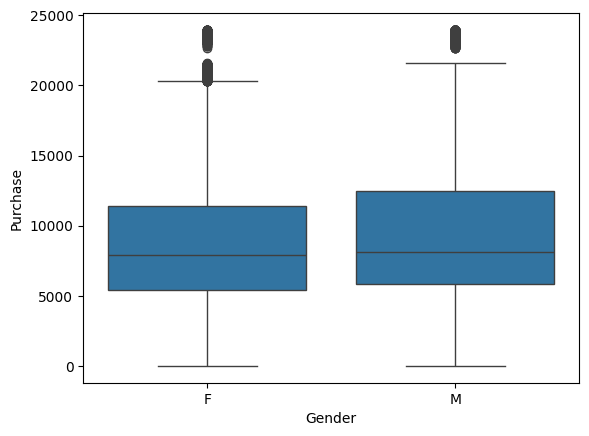

In [49]:
#Boxplot for Gender and Purchase:

sns.boxplot(data = df, x= 'Gender', y='Purchase' )
plt.show()

<ipython-input-52-a0d5fe338fcf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


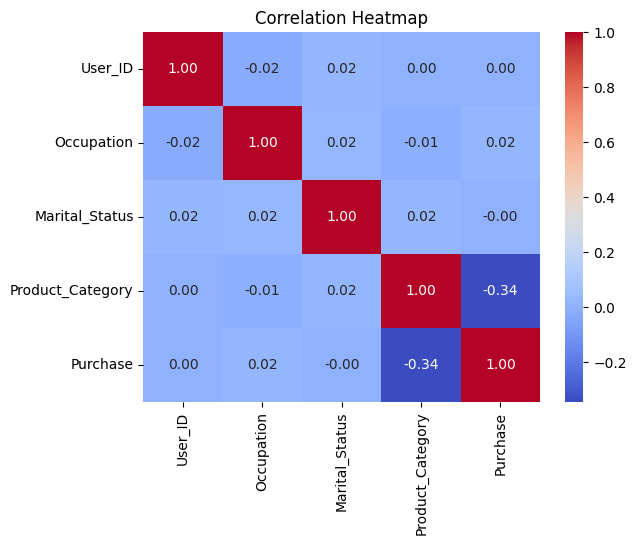

In [52]:
#Correlation using Heatmap:

corr = df.corr()
sns.heatmap(data = corr, annot = True,cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

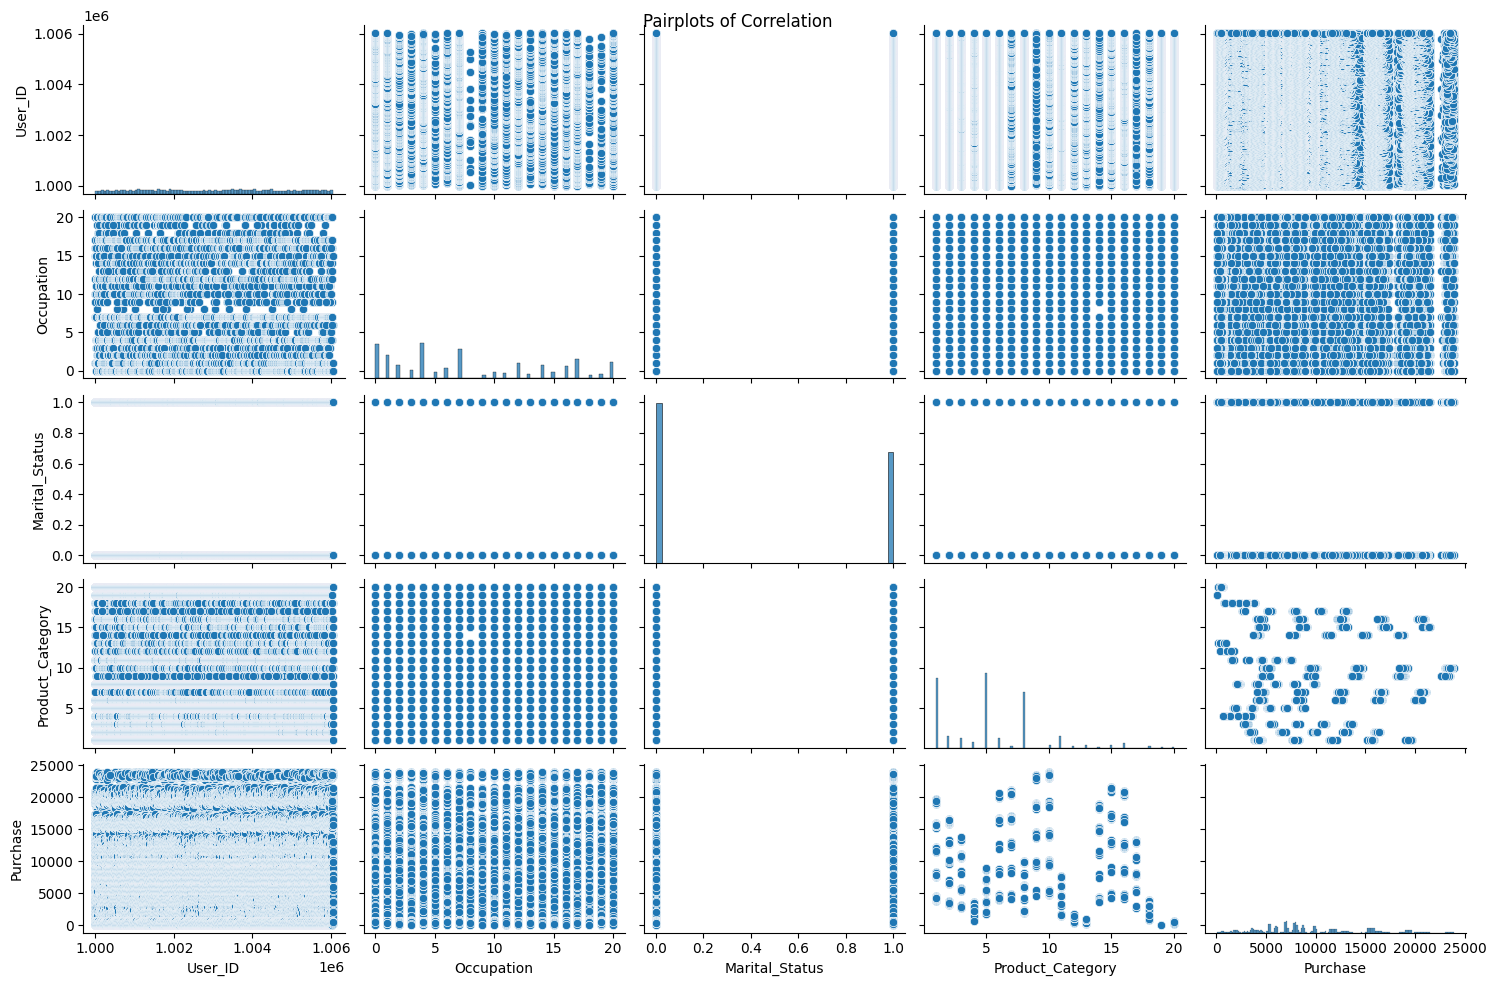

In [56]:
#Correlation using Pairplots:

sns.pairplot(df, height=2,aspect = 1.5)
plt.suptitle('Pairplots of Correlation')

plt.show()

In [22]:
# Chcking the NULL value:

df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [58]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


In [23]:
# Outlier Detection for the dataset:

Q3 = np.percentile(df[['Marital_Status','Product_Category','Purchase']],75)
Q1 = np.percentile(df[['Marital_Status','Product_Category','Purchase']],25)

IQR = Q3 - Q1
print('IQR =',IQR)

Upper = Q3 + 1.5*IQR
Lower = Q1 - 1.5*IQR
print('Upper =',Upper)
print('Lower =',Lower)

IQR = 5822.0
Upper = 14556.0
Lower = -8732.0


In [66]:
# Outlier Detection for the Marital_Status in the dataset:

Q3 = np.percentile(df['Marital_Status'],75)
Q1 = np.percentile(df['Marital_Status'],25)

IQR = Q3 - Q1
print('IQR =',IQR)

Upper = Q3 + 1.5*IQR
Lower = Q1 - 1.5*IQR
print('Upper =',Upper)
print('Lower =',Lower)

IQR = 1.0
Upper = 2.5
Lower = -1.5


In [68]:
# Outlier Detection for the Product_Category in the dataset:

Q3 = np.percentile(df['Product_Category'],75)
Q1 = np.percentile(df['Product_Category'],25)

IQR = Q3 - Q1
print('IQR =',IQR)

Upper = Q3 + 1.5*IQR
Lower = Q1 - 1.5*IQR
print('Upper =',Upper)
print('Lower =',Lower)

IQR = 7.0
Upper = 18.5
Lower = -9.5


In [24]:
# Outlier Detection for the Purchase in the dataset:

Q3 = np.percentile(df['Purchase'],75)
Q1 = np.percentile(df['Purchase'],25)

IQR = Q3 - Q1
print('IQR =',IQR)

Upper = Q3 + 1.5*IQR
Lower = Q1 - 1.5*IQR
print('Upper =',Upper)
print('Lower =',Lower)

IQR = 6231.0
Upper = 21400.5
Lower = -3523.5


## ***Business Insights based on Non- Graphical and Visual Analysis:***

---



**Countplot for Gender:**


* The count of the male in the given dataset was higher than female.
* the count value of female was equal to 150000 and for the female was 400000

**Countplot for Age and Gender:**


* The average age of 25-35 was the highest for the both male and female. The second highest age group was 36-45 in the given dataset.


**Countplot for City_Category and Gender:**


* Out of 3 city catgories, B had the highest count in both the male and female gender.

**Countplot for Marital status and Gender:**


*   The categories of married and unmarried have been renamed as 0 and 1.
*    In both the Male and Female gender, Married counts seems to be higher from the given dataset.

**Distplot for Purchase:**


*   The Purchase value ranges from 0 to 25000.
*   In the overall, the density of the purchase count between the 5000 to 10000 was the highest in the overall dataset.

**Histplot for Occupation:**


*   The Occupation count has been splited into bins, range from 0 to 20.


**Countplot for Gender:**


* The count of the male in the given dataset was higher than female.
* the count value of female was equal to 150000 and for the female was 400000

**Countplot for Age and Gender:**


* The age catgory of 25-35 was the highest for the both male and female. The second highest age group was 36-45 in the given dataset.


**Countplot for City_Category and Gender:**


* Out of 3 city catgories, B had the highest count in both the male and female gender.

**Countplot for Marital_Status and Gender:**


*   The categories of married and unmarried have been renamed as 0 and 1.
*    In both the Male and Female gender, Married counts seems to be higher from the given dataset.

**Distplot for Purchase:**


*   The Purchase value ranges from 0 to 25000.
*   In the overall, the density of the purchase count between the 5000 to 10000 was the highest in the overall dataset.

**Histplot for Occupation:**


*   The Occupation count has been splited into bins, range from 0 to 20.


*   The range between 0 to 1.25 was the highest count when compared to all others.

**Boxplot for Gender and Age:**


*   The average range for the both the gender is between 46-50.

**Boxplot for Product_Category and Purchase:**


*   The categories of products ranged from 0 to 20.
*   In the overall, the product category of 6,7 and 15 has the highest average counts when compared to the others.

**Boxplot for City_Category and Purchase:**


*   In all the city-categories, The average range between 5000 and 13000 was the common.
*   The average of all 3 catgories was almost similar.

**Boxplot for Age and Purchase:**


*   The age categories and purchase value counts was ranged from 5000 to 12000.
*   The average range of all the age category was almost similar.


In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [38]:
#1) Are women spending more money per transaction than men? Why or Why not?

#Null Hypothesis (H0): There is no significant difference in the average purchase amount between men and women.
#Alternative Hypothesis (Ha): Women spend more money per transaction than men.

men_purchase = df[df['Gender'] == 'M']['Purchase']
women_purchase = df[df['Gender'] == 'F']['Purchase']

ttest_ind(men_purchase, women_purchase)

TtestResult(statistic=44.837957934353966, pvalue=0.0, df=550066.0)

Since P value is less than alpha(0.05), need to reject null.
This concludes that Women spend more money per transaction than men.

In [50]:
#2) Confidence intervals and distribution of the mean of the expenses by female and male customers

male_expenses = df[df['Gender'] =='M']['Purchase']
female_expenses = df[df['Gender'] =='F']['Purchase']

mu_male = male_expenses.mean()
mu_female = female_expenses.mean()

std_male = male_expenses.std()
std_female = female_expenses.std()

len_male = len(male_expenses)
len_female = len(female_expenses)

from scipy.stats import norm
male_expenses_CI = norm(loc = mu_male, scale = (std_male / ((len(male_expenses))**2))).interval(0.95)
female_expenses_CI = norm(loc = mu_female, scale = (std_female / ((len(female_expenses))**2))).interval(0.95)

print('Confidence Interval for Male Expenses:', male_expenses_CI)
print('Confidence Interval for Female Expenses:', female_expenses_CI)

Confidence Interval for Male Expenses: (9437.526040414106, 9437.526040530423)
Confidence Interval for Female Expenses: (8734.565764648885, 8734.565765662066)


**3) Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**


If the confidence intervals of average male and female spending overlap, it suggests that there is no statistically significant difference between the mean spending of males and females. In such a case, Walmart may conclude that, based on the collected data, there is not enough evidence to say that the average spending of males differs significantly from that of females.

Here are some implications and potential actions Walmart could consider:

**Targeted Marketing Strategies:**

Since there is no significant difference in spending between genders, Walmart can continue or adjust its marketing strategies to appeal to a broad audience, considering both male and female customers.


**Product Placement and Promotion:**

Walmart can continue to place and promote products without relying heavily on gender-specific marketing. Focus on universal appeal and utility of products to cater to a diverse customer base.


**Inventory Management:**

Evaluate inventory levels and product assortment based on overall customer preferences rather than gender-specific buying patterns. This can help optimize stock levels and minimize overstock or stockouts.


**Customer Experience:**

Ensure that the shopping experience is inclusive and caters to the needs and preferences of both male and female customers. This may involve creating a gender-neutral shopping environment.


**Customer Engagement Programs:**

Develop customer engagement programs, loyalty programs, or promotions that appeal to a broad demographic, emphasizing inclusivity and diversity.


**Continuous Monitoring:**

Continue to monitor customer spending patterns over time. Regularly analyze data to identify any emerging trends or shifts in customer behavior that might warrant adjustments in strategies.



In [58]:
#Results when the same activity is performed for Married vs Unmarried?

#Null Hypothesis (H0): There is no significant difference in the average purchase amount married and unmarried.
#Alternative Hypothesis (Ha): Married spend more money per transaction than unmarried.

married_spend = df[df['Marital_Status'] == 0]['Purchase']
unmarried_spend = df[df['Marital_Status'] == 1]['Purchase']

ttest = ttest_ind(married_spend,unmarried_spend)
print('Ttest:',ttest)

mu_married = married_spend.mean()
mu_unmarried = unmarried_spend.mean()

std_married = married_spend.std()
std_unmarried = unmarried_spend.std()

len_married = len(married_spend)
len_unmarried = len(unmarried_spend)

from scipy.stats import norm
married_expenses_CI = norm(loc = mu_married, scale = (std_married / ((len_married)**2))).interval(0.95)
unmarried_expenses_CI = norm(loc = mu_unmarried, scale = (std_unmarried / ((len_unmarried)**2))).interval(0.95)

print('Confidence Interval for Married Expenses:', married_expenses_CI)
print('Confidence Interval for Unmarried Expenses:', unmarried_expenses_CI)

Ttest: TtestResult(statistic=0.3436698055440526, pvalue=0.7310947525758316, df=550066.0)
Confidence Interval for Married Expenses: (9265.907618828065, 9265.907619014948)
Confidence Interval for Unmarried Expenses: (9261.174573888724, 9261.174574276023)


Conclusion:


*   Since P value is greater than Alpha, failed to reject Null.
*   There is no significant difference in the average purchase amount married and unmarried.


*   CI for married and unmarried expenses are overlapping each other.






Walmart can leverage this conclusion to implement inclusive and targeted strategies. Here are some potential actions:

**Unified Marketing Strategies:**

Rather than creating separate marketing campaigns for married and unmarried customers, Walmart can adopt unified marketing strategies that appeal to a broad audience. Focus on universal themes, values, and product benefits that resonate with all customers.


**Product Placement and Promotion:**

Optimize product placement and promotions to cater to the general preferences of both married and unmarried customers. Avoid overly gendered or marital status-specific marketing tactics.


**Inventory Management:**

Streamline inventory management by considering overall customer preferences rather than segmenting based on marital status. This can help Walmart maintain balanced stock levels and respond to changing market demands.


**Inclusive Customer Experience:**

Ensure that the in-store and online shopping experience is inclusive and welcoming to customers of all marital statuses. Implement policies and features that cater to diverse customer needs.


**Customer Loyalty Programs:**

Develop customer loyalty programs and promotions that are inclusive and provide benefits to all customers, regardless of marital status. This can enhance customer satisfaction and retention.


**Market Research for Diverse Preferences:**

Continue to conduct market research to understand diverse customer preferences, including those related to marital status. Stay attuned to evolving consumer trends and adjust strategies accordingly.


**Employee Training:**

Train employees to provide excellent customer service to all customers, irrespective of marital status. Ensure staff members are knowledgeable about a wide range of products to assist diverse customer needs.


**Community Engagement:**

Engage with the local community in a way that reflects inclusivity. Sponsor events or initiatives that appeal to a diverse audience, reflecting the variety of customer backgrounds.


**Feedback Mechanism:**

Establish a feedback mechanism to gather insights directly from customers. This can provide valuable information on preferences, concerns, and suggestions for improvements.


**Dynamic Marketing Adaptation:**

Develop dynamic marketing strategies that can adapt to changing customer behaviors. Regularly reassess the effectiveness of marketing campaigns and make adjustments based on customer feedback and market trends.

In [69]:
#Results when the same activity is performed for Age

#Null Hypothesis (H0): There is no significant difference in the average purchase amount with respect to age group.
#Alternative Hypothesis (Ha): There is significant difference

a = df[df['Age']== '0-17']['Purchase']
b = df[df['Age']== '26-35']['Purchase']
c = df[df['Age']== '36-45']['Purchase']
d = df[df['Age']== '18-25']['Purchase']
e = df[df['Age']== '46-50']['Purchase']
f = df[df['Age']== '51-55']['Purchase']
g = df[df['Age']== '55+']['Purchase']

from scipy.stats import f_oneway
print(f_oneway(a,b,c,d,e,f,g))


mu_a = a.mean()
mu_b = b.mean()
mu_c = c.mean()
mu_d = d.mean()
mu_e = e.mean()
mu_f = f.mean()
mu_g = g.mean()

std_a = a.std()
std_b = b.std()
std_c = c.std()
std_d = d.std()
std_e = e.std()
std_f = f.std()
std_g = g.std()

len_a = len(a)
len_b = len(b)
len_c = len(c)
len_d = len(d)
len_e = len(e)
len_f = len(f)
len_g = len(g)

from scipy.stats import norm
a_CI = norm(loc = mu_a, scale = (std_a / ((len_a)**2))).interval(0.95)
b_CI = norm(loc = mu_b, scale = (std_b / ((len_b)**2))).interval(0.95)
C_CI = norm(loc = mu_c, scale = (std_c / ((len_c)**2))).interval(0.95)
d_CI = norm(loc = mu_d, scale = (std_d / ((len_d)**2))).interval(0.95)
e_CI = norm(loc = mu_e, scale = (std_e / ((len_e)**2))).interval(0.95)
f_CI = norm(loc = mu_f, scale = (std_f / ((len_f)**2))).interval(0.95)
g_CI = norm(loc = mu_g, scale = (std_g / ((len_g)**2))).interval(0.95)

print('Confidence Interval for age 0-17:', a_CI)
print('Confidence Interval for age 26-35:', b_CI)
print('Confidence Interval for age 36-45:', C_CI)
print('Confidence Interval for age 18-25:', d_CI)
print('Confidence Interval for age 46-50:', e_CI)
print('Confidence Interval for age 51-55:', f_CI)
print('Confidence Interval for age 55+:', g_CI)

F_onewayResult(statistic=40.57579909450409, pvalue=1.053563939251671e-49)
Confidence Interval for age 0-17: (8933.464596521697, 8933.464684368251)
Confidence Interval for age 26-35: (9252.690632666221, 9252.690633073555)
Confidence Interval for age 36-45: (9331.35069410445, 9331.350695731297)
Confidence Interval for age 18-25: (9169.663605267835, 9169.663607254743)
Confidence Interval for age 46-50: (9208.625692806998, 9208.625702129657)
Confidence Interval for age 51-55: (9534.808024233611, 9534.80803768686)
Confidence Interval for age 55+: (9336.280438208314, 9336.280480690495)


Conclusion:

Since P value is less than Alpha, Null hypothesis has to be rejected.

- There is significant difference in the average purchase amount with respect to age group.
- CI of all age groups are overlapping


Walmart can leverage this conclusion to make strategic changes and improvements. Here are some potential actions:

**Targeted Marketing Campaigns:**

Develop targeted marketing campaigns that cater to specific age groups showing significant differences in purchasing behavior. Tailor promotions, advertisements, and product recommendations based on the preferences of these age segments.


**Customer Segmentation Refinement:**

Refine customer segmentation by age group and consider additional factors such as income, location, or product preferences. This can help Walmart create more nuanced and targeted strategies for each segment.


**Personalized Offers:**

Implement personalized offers or discounts based on the identified age groups. Leverage customer data to provide tailored incentives that resonate with the purchasing behavior of each age category.


**Inventory Optimization:**

Optimize inventory management for products that are popular among specific age groups. Ensure that stock levels are aligned with the demand patterns observed within each age segment.


**Product Placement and Promotion:**

Adjust the placement and promotion of products in-store or online to cater to the preferences of the age groups exhibiting significant differences. Highlight products that are likely to resonate with the identified customer segments.


**Customer Experience Enhancements:**

Enhance the overall shopping experience for the identified age groups. This may include improvements in online interfaces, in-store layouts, and customer service tailored to the preferences of these customers.


**Feedback and Surveys:**

Gather feedback from customers within the identified age groups to understand their specific needs, preferences, and expectations. Use surveys or feedback mechanisms to collect valuable insights directly from the target audience.


**Cross-Selling and Upselling Strategies:**

Develop cross-selling and upselling strategies based on the purchasing behavior of different age groups. Bundle products or recommend complementary items to enhance the shopping experience and increase overall spending.


**Promote Loyalty Programs:**

Promote and optimize loyalty programs that are attractive to the identified age groups. Tailor loyalty benefits to align with the preferences and priorities of these customers.


**Continuous Monitoring and Adaptation:**

Continuously monitor purchasing patterns across age groups and be prepared to adapt strategies based on changing consumer behavior. Regularly reassess the effectiveness of implemented changes.


**Collaboration with Brands:**

Collaborate with brands that are popular among specific age groups to create exclusive partnerships, promotions, or product launches that resonate with the target demographic.


**Data-driven Decision Making:**

Utilize data analytics to make informed decisions. Regularly analyze customer data to identify trends, patterns, and opportunities for improvement.

# ***Recommendations:***

---



Some of the actionable recommendations for the business based on the provided dataset:

**Targeted Marketing Campaigns:**

Create targeted marketing campaigns based on age groups, focusing on products that align with the preferences of each demographic, specifically for the age groups between 26-35 and 36-45.


**Personalized Offers for Marital Status:**

Tailor promotions and discounts based on marital status. For example, offer exclusive deals for married or unmarried customers. This would help to increase the business by having an emotional connect with the customers.


**City-Specific Promotions:**

Implement city-specific promotions to cater to the unique preferences and needs of customers in different city categories (A, B, C). Target more on the City B category, since we have higher counts of existing customers.


**Customer Loyalty Programs:**

Introduce or enhance customer loyalty programs to encourage repeat purchases, offering rewards and benefits that resonate with diverse customer segments.
especially for the male genders(their counts are higher than female).

**Occupation-Based Recommendations:**

Provide product recommendations or discounts based on occupation categories, ensuring a personalized shopping experience for customers from various professional backgrounds.


**Product Category Bundles:**

Create product category bundles or packages to encourage customers to purchase complementary items, enhancing their overall shopping experience.


**Promote Long-Term Stay Offers:**

Develop promotions or loyalty incentives specifically for customers who have stayed in their current city for a longer duration, encouraging long-term engagement.


**Customer Feedback Mechanism:**

Implement a simple and accessible customer feedback mechanism to gather insights directly from users, helping to understand their needs and preferences.This would help to increase the business instanly.


**Diversify Product Categories:**

Diversify product offerings across different categories to appeal to a broader audience, ensuring a well-rounded inventory that meets varied customer interests. More focus on the product_Categories 6,7 and 15 since they have the highest average counts.


**Continuous Monitoring and Adaptation:**

Regularly monitor sales data and customer feedback to adapt strategies in real-time. Stay agile and responsive to changing customer behavior and market dynamics.

**These are the valueable recommendations to increase the walmart business.**